<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/I2K_2023/diff_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

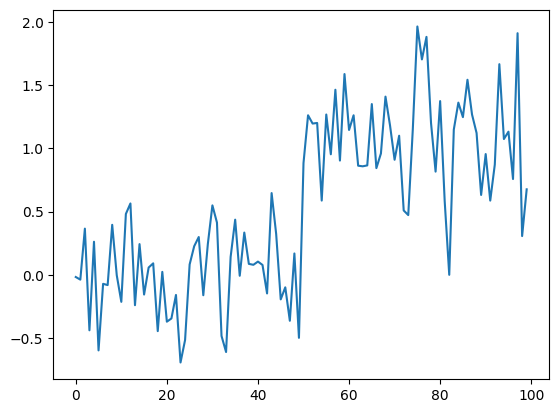

In [31]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as ndi

signal = np.zeros(100)
signal[50:]=1
np.random.seed(21)
noise = np.random.normal(0,0.35,signal.shape)
noisy = signal + noise
plt.plot(noisy)

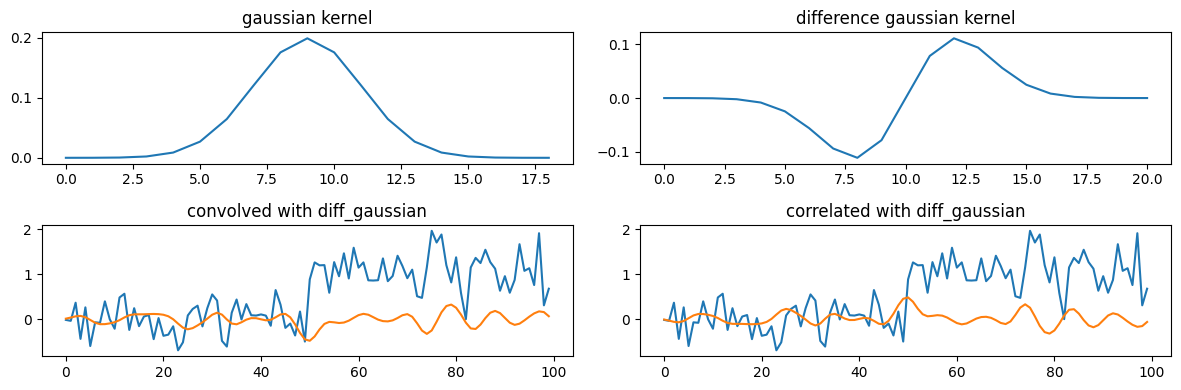

In [41]:
xi = np.arange(19)
x0 = 19//2
x= xi-x0
sigma = 2
kernel = (
    (1/np.sqrt(2*np.pi*sigma**2))
    *np.exp(-x**2/(2*sigma**2))
)

diff_kernel = np.convolve(kernel,[-1,0,1])
fig,ax = plt.subplots(2,2,figsize=(12,4))
ax[0,0].plot(kernel)
ax[0,0].set_title('gaussian kernel')
ax[0,1].plot(diff_kernel)
ax[0,1].set_title('difference gaussian kernel')
ax[1,0].plot(noisy)
ax[1,0].plot(ndi.convolve(noisy,diff_kernel))
ax[1,0].set_title('convolved with diff_gaussian')
ax[1,1].plot(noisy)
ax[1,1].plot(ndi.correlate(noisy,diff_kernel))
ax[1,1].set_title('correlated with diff_gaussian')

fig.tight_layout() # the title doesn't overlap

# convolve vs correlate, the sharpest peak points down vs up at the step function